## Module 1

# Image Preprocessing

### Importing libraries

In [2]:
from zipfile import ZipFile, ZIP_DEFLATED
# from sklearn.preprocessing import 
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

### Root variables

In [4]:
folder_path = "./ImageFolder/"
# user = 'animals.zip'  # Extracted from folder name
user = "cat2dog.zip"

### User defined functions

In [5]:
def UnzipFolder(folder_path=folder_path, user=user):
    with ZipFile(folder_path+user, 'r') as zipObj:
        zipObj.extractall(folder_path)
        user = user.replace(".zip", "")
    return user

In [6]:
def ImageProcess(folder_path=folder_path, user=user):
    folder_names = os.listdir(folder_path)

    # Store the folder names in class_names dictionary
    class_names = {}
    for name in folder_names:
        try:
            class_names[name] = (os.listdir(folder_path+name))
        except:
            continue
    print(class_names)
    # Store images in array form
    img_size = 224
    files = []
    for i in class_names[user]:
        images = []
        for img in glob.glob(folder_path+user+"/"+i+"/*.*"):
            img_arr = cv2.imread(img)[...,::-1]
            img_arr = cv2.resize(img_arr, (img_size, img_size))

            if(img_arr.shape[2] == 3):  # if image is colored (RGB)
                img_arr_reshape = img_arr.reshape(img_arr.shape[0], -1)  # reshape it from 3D matrice to 2D matrice

            else:  # if image is grayscale
                img_arr_reshape = img_arr

            images.append(img_arr_reshape)
        images = np.array(images)
        np.save(i, images)
        files.append(i+'.npy')
    return files

In [7]:
def CheckZip(folder_path, user):
    if user.endswith(".zip"):
        user = UnzipFolder(folder_path, user)
        print(f'{user} unzipped')
    class_names=ImageProcess(folder_path, user)
    print("Images saved")

    with ZipFile(user+'.zip', 'w') as zipF:
        for file in class_names:
            zipF.write(file, compress_type=ZIP_DEFLATED)
    print('Final zip file saved')

### Calling parent function

In [8]:
CheckZip(folder_path, user)

cat2dog unzipped
{'cars': ['hatchback', 'sedan', 'suv'], 'cat2dog': ['testA', 'testB', 'trainA', 'trainB']}
Images saved
Final zip file saved


### Reading saved files

In [14]:
loaded_array = np.load("./testA.npy")
load_original_arr = loaded_array.reshape(loaded_array.shape[0], loaded_array.shape[1], loaded_array.shape[2] // 3, 3)

In [19]:
loaded_array.shape

(100, 224, 672)

In [18]:
loaded_array

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [227, 240, 251, ..., 168, 168, 168],
        [222, 234, 246, ..., 168, 168, 168],
        [222, 234, 246, ..., 172, 172, 172]],

       [[243, 243, 243, ..., 246, 246, 246],
        [243, 243, 243, ..., 246, 246, 246],
        [243, 243, 243, ..., 246, 246, 246],
        ...,
        [248, 236, 240, ..., 113, 106, 100],
        [243, 236, 244, ..., 112, 107, 103],
        [242, 236, 246, ..., 112, 107, 103]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [235, 234, 240, ..., 244, 232, 220],
        [235, 234, 240, ..., 242, 230, 218],
        [235, 234, 240, ..., 233, 221, 209]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [16]:
load_original_arr

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[227, 240, 251],
         [227, 241, 252],
         [229, 242, 252],
         ...,
         [172, 173, 170],
         [168, 168, 168],
         [168, 168, 168]],

        [[222, 234, 246],
         [225, 237, 249],
         [227, 238, 249],
         ...,
         [169, 170, 168],
         [168, 168, 168],
         [168, 168, 168]],

        [[222, 234, 246],
         [225, 237, 247],
         [227, 239, 248],
         ...,
         [171, 172, 169],
        

In [17]:
load_original_arr.shape

(100, 224, 224, 3)

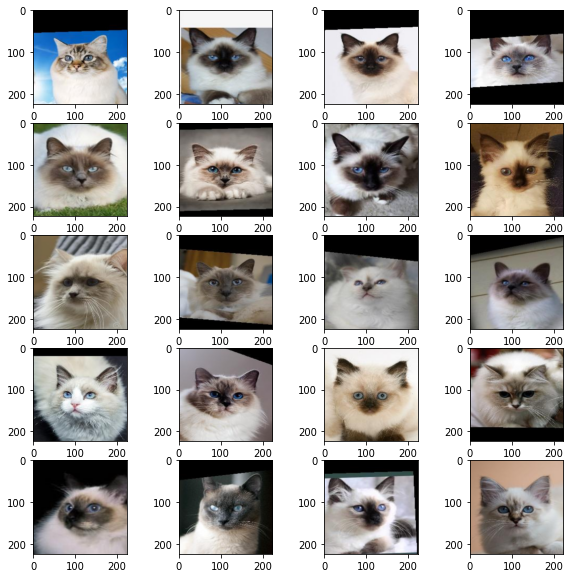

In [10]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
ct=0
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(load_original_arr[ct])
    ct+=1
plt.show()

In [ ]:
cv2.imshow("cat", load_original_arr[0])
cv2.waitKey(0)

In [11]:
loaded_array = np.load("./testB.npy")
load_original_arr = loaded_array.reshape(loaded_array.shape[0], loaded_array.shape[1], loaded_array.shape[2] // 3, 3)

In [12]:
load_original_arr.shape

(100, 224, 224, 3)

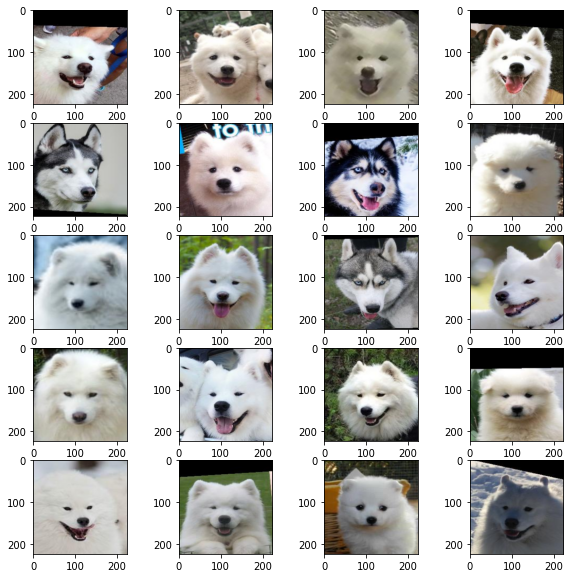

In [13]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
ct=0
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(load_original_arr[ct])
    ct+=1
plt.show()

In [ ]:
cv2.imshow("dog", load_original_arr[0])
cv2.waitKey(0)

## End of Module 1

# Old

In [ ]:
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image # We have not used this Library as it gives errors for some Images in the dataset
from matplotlib import pyplot
import pandas as pd
import cv2 # We will use cv2 library as it does not return any error while preprocessing
from zipfile import ZipFile

In [ ]:
# Unzip files
with ZipFile('angry.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    
    image = cv2.imread(filename,1)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # convert to array
    required_size=(32, 32) # required size of the image
    image = cv2.resize(image, required_size) 
    
    pixels = asarray(image)
    return pixels

In [ ]:
# load images and extract faces for all images in a directory
def create_image_array(directory):
   
    imgs = []
    wdf=pd.read_csv("/path-to-csv-file/filename.csv")
    # Loading only first 10000 images as array. 
    # Note: You can use more images but consider the RAM limit that you have. 
    # Otherwise the session might collapse during tarining.
    for index, row in wdf.iloc[:10000].dropna().iterrows():
        
      # load the image
      pixels = load_image(directory + row['image_name'] + ".jpg")
      
      imgs.append(pixels)
      print(len(imgs), pixels.shape)
      
    return asarray(imgs)

# This function is used when we have names of the image in a csv file. To read from folder we will write another function


In [ ]:
# directory that contains all images
directory = '/path-to-the-image-directory/'  
# load and extract the images as numpy array
gpimgs = create_image_array(directory)
print('Loaded: ', gpimgs.shape)

In [ ]:
savez_compressed('/path-to-save-numpy-zipped-array/filename.npz', gpimgs)

In [ ]:
print('Loaded: ', gpimgs.shape)